<h1> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/toctree.html'> Assignment 2:  Algorithm Analysis  </a> </h1>

<h3> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/ProgrammingExercises.html'> 2.11 Programming Exercises  </a> </h3>

Q1: What are the time complexity with Big-O notation for each of the following operations?
* list index operator
* dictionary get operator
* dictionary set operator
* del operator for lists 
* del operator for dictionaries 


Q1: answer
* list index operator:        O(1)
* dictionary get operator:    O(1)
* dictionary set operator:    O(1)
* del operator for lists :    O(n)
* del operator for dictionaries:   O(1)

In [1]:
1+2

3

Q2: (Continue) The following is an experiment to verify the time complexity of operations mentioned above.
 Fill in one of the five timeit.Timer objects (oa, ob,oc,od,oe) in the program  that are used to measure the perfromance of the following 
* list index operator             
* Ans: _____oa _________ (Choose one of the objects oa, ob,oc,od,oe in the program.) 
* dictionary get operator         
* Ans: ______ob ________ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* dictionary set operator  
* Ans: ______oc________ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* del operator for lists   A
* Ans: ______od________ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* del operator for dictionaries   
* Ans: ______oe________ (Choose one of the objects oa, ob,oc,od,oe in the program.)

In [2]:
"""

#2.1 Devise an experiment to verify that the list index operator is O(1)
#2.2 Devise an experiment to verify that get item and set item are O(1) for dictionaries.
#2.3 Devise an experiment that compares the performance of the 
      del operator on lists and dictionaries.
      
"""
import timeit
import random as r

oa = timeit.Timer("for i in L: lis[i]", "from __main__ import lis,L")
ob = timeit.Timer("for i in L: dict[i]", "from __main__ import dict,L")
oc = timeit.Timer("for i in L: dict[i]=-i", "from __main__ import dict,L")

od = timeit.Timer("for i in L: del lis[i]", "from __main__ import  lis,L; ")
oe = timeit.Timer("for i in L: del dict[i]", "from __main__ import  dict,L; ")


inc = 100000   #100000
print("%8s: %15s %15s %15s %15s %15s " \
      %("index", "list_index","dict_get","dict_set", "list_del", "dict_del" ))
num_repeats = 1       # 100000
m = 100
X= list ( range ( inc, inc*11, inc))
A=[]; B=[]; C=[]; D=[]; E=[]
for n in X :
    lis = list(range(n))
    dict = { i : i for i in lis }
    L = list(range(0,n-m, n//m ))  # index
       
    a = oa.timeit(number=num_repeats)
    b = ob.timeit(number=num_repeats)
    c = oc.timeit(number=num_repeats)
    A.append ( a )
    B.append ( b )
    C.append ( c)
    
    d = od.timeit(number=num_repeats)
    e = oe.timeit(number=num_repeats)

    D.append(d)
    E.append (e )
    print("%8d: %15.5f %15.5f %15.5f %15.5f %15.5f " %(n, \
    a, b, c, d, e  ))


   index:      list_index        dict_get        dict_set        list_del        dict_del 
  100000:         0.00004         0.00003         0.00002         0.00261         0.00005 
  200000:         0.00003         0.00003         0.00002         0.00673         0.00004 
  300000:         0.00003         0.00004         0.00001         0.00993         0.00004 
  400000:         0.00004         0.00003         0.00001         0.01388         0.00011 
  500000:         0.00007         0.00005         0.00004         0.03219         0.00005 
  600000:         0.00006         0.00003         0.00001         0.02399         0.00008 
  700000:         0.00015         0.00037         0.00007         0.10766         0.00025 
  800000:         0.00006         0.00012         0.00009         0.03649         0.00007 
  900000:         0.00012         0.00005         0.00002         0.06392         0.00006 
 1000000:         0.00009         0.00005         0.00003         0.05750         0.00005 

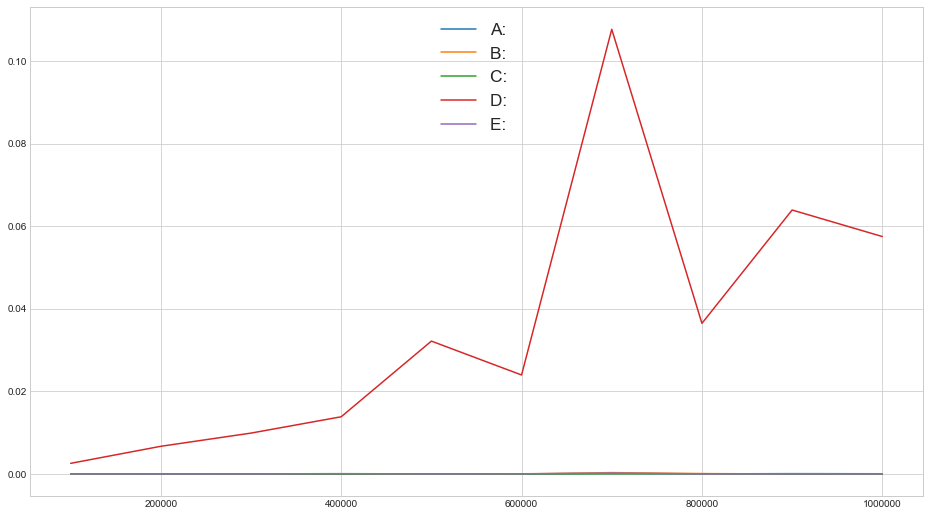

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))


plt.plot(X, A, label="A: ")
plt.plot(X, B, label='B: ')
plt.plot(X, C, label='C: ')

plt.plot(X, D, label="D: ")
plt.plot(X, E, label='E: ')

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

#   END of ASSIGNMENT

In [5]:
"""
__author__      = "Albert Tsao"
__copyright__   = "Copyright 2019"
"""
import itertools
import string

def anagramSolution1(s1,s2):  # O(n^2)
    alist = list(s2)

    pos1 = 0
    stillOK = True

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK



def anagramSolution2(s1,s2): # O(n log n)
    """
    If s1 and s2 are sorted first, then they are anagram if s1==s2 

    @param param1: the 1st string
    @param param2: second string
    @return: true if s1 and s2 are anagram
    @raise keyError: raises an exception
    """

    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort()
    alist2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

def anagramSolution3(s1,s2): # O(n!) >  O(2^n)
  for s3 in itertools.permutations(s1):
    if "".join(s3)==s2:
      return True
  return False

def anagramSolution4(s1,s2):  # O(n)
    """
      count and compare
    """
    n = len(string.ascii_lowercase)
    d={}
    for i in string.ascii_lowercase:
        d[i]=0

    for i in s1:
        d[i]+=1
    for i in s2:
        d[i]-=1

    for i in d:
        if d[i]!=0:
            return False
    return True


def main():
  d = {}
  d['abcd'] = 'dcba'
  d['abcde'] = 'edcba'
  d['apple'] = 'pleap'

  assert(anagramSolution2('abcde','edcba'))
  assert(anagramSolution3('abcde','edcba'))
  assert (anagramSolution4('apple','pleap'))

  for s, t in d.items():
      assert (anagramSolution1(s,t))
      assert (anagramSolution2(s,t))
      assert (anagramSolution3(s,t))
      assert (anagramSolution4(s,t))

    # my code here

if __name__ == "__main__":
    main()
main()

In [7]:
"""

#2.1 Devise an experiment to verify that the list index operator is O(1)
#2.2 Devise an experiment to verify that get item and set item are O(1) for dictionaries.
#2.3 Devise an experiment that compares the performance of the 
      del operator on lists and dictionaries.
      
"""
import timeit
import random as r
import string

oa = timeit.Timer("anagramSolution1(w1,w2)", "from __main__ import anagramSolution1,w1,w2")
ob = timeit.Timer("anagramSolution2(w1,w2)", "from __main__ import anagramSolution2,w1,w2 ")
oc = timeit.Timer("anagramSolution4(w1,w2)", "from __main__ import anagramSolution4, w1,w2")


inc = 1000  
print("%8s: %15s %15s %15s"%( "n", "O(n^2)", "O(n log n)","O(n)" ))
num_repeats = 1       # 100000
m = 1
X= list ( range ( inc, inc*11, inc))
A=[]; B=[]; C=[];
allchar = string.ascii_lowercase 

for n in X :
    w1 = "".join(r.choice(allchar) for x in range(n))
    w2 = "".join(r.choice(allchar) for x in range(n))

    a = oa.timeit(number=num_repeats)
    b = ob.timeit(number=num_repeats)
    c = oc.timeit(number=num_repeats)
    A.append ( a )
    B.append ( b )
    C.append ( c)
    

    print("%8d: %15.5f %15.5f %15.5f " %(n,a, b, c  ))


       n:          O(n^2)      O(n log n)            O(n)
    1000:         0.09101         0.00027         0.00023 
    2000:         0.22479         0.00050         0.00041 
    3000:         0.93051         0.00183         0.00085 
    4000:         1.91181         0.00141         0.00109 
    5000:         2.78779         0.00131         0.00105 
    6000:         3.88328         0.00157         0.00143 
    7000:         6.16787         0.00677         0.00282 
    8000:         9.56934         0.00210         0.00176 
    9000:        10.50834         0.00270         0.00210 
   10000:        12.01632         0.00280         0.00225 


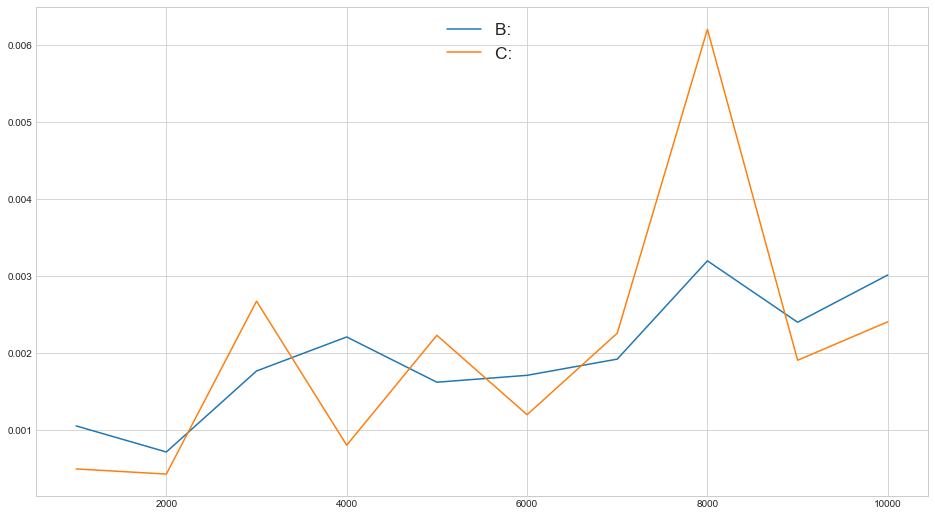

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))


#plt.plot(X, A, label="A: ")
plt.plot(X, B, label='B: ')
plt.plot(X, C, label='C: ')


plt.legend(loc="upper center", fontsize="xx-large")
plt.show()